# CSE152B: Homework 3
## Computing Resources
Please read the README file of this repository for the instructions
## Instructions
1. Attempt all questions.
2. Please comment all your code adequately.
3. Include all relevant information such as text answers, output images in notebook.
4. **Academic integrity:** The homework must be completed individually.

5. **Submission instructions:**  
 (a) Submit the notebook and its PDF version on Gradescope.  
 (b) Rename your submission files as Lastname_Firstname.ipynb and Lastname_Firstname.pdf.  
 (c) Correctly select pages for each answer on Gradescope to allow proper grading.

6. **Due date:** Thu, Jun 4, at 4pm PST

## Q1: UNet for Image Segmentation

``ALL the scripts here should be run from ./Segmentation``

1. **Check the codes in `Segmentation`.** In this homework, we have provided the training script, the evaluation code, 3 verisons of the UNet structures and some useful functions. You will be asked to test out different variations of network structures and report their performance on the test set. The provided codes include:
    1. `test.py`: The file for evaluation. 
    2. `dataLoader.py`: The file to load the data for training and testing.  
    3. `model.py`: The file for models. The residual block (`ResBlock`) and the code to load pretrained weights of `resnet18` are given as `loadPretrainedWeight`. The basic encoder and decoder (`encoder` and `decoder`), as well as the ones with dilation/SPP (`encoderDilation` and `decoderDilation`) are also given. 
    4. `colormap.mat`: The color map used to visualize segmentation results. 
    5. `utils.py`: The file for some useful functions. The `computeAccuracy` function computes the unnormalized confusion matrix of each batch of labels. The `save_label` function turns the label into an image using the given color map and saves the image at the assigned location. Also see `test.py` for how these two functions are being used. 
    6. `train.py`: The file of the training script. 

**The network structures.**  There are 3 versions of UNet structures. In all three versions,  the `resnet18` structure before average pooling and fully connected layer is be used as the building block for encoder. 

1. `Basic UNet`: Please see `encoder` and `decoder` class in `model.py`. The `encoder` comes from `resnet18` and the decoder consists of transpose convolutional layers and bilinear interpolation layers so that the final output will be of the same size as the image. Skip links are added to help the network recover more details. 

2. `UNet with dilation`: We modify the encoder to a dilated `resnet18` as described in Section 2 of [1]. We set the stride of the last 4 residual blocks to be 1 so that the highest level feature maps will be $4\times 4$ times larger. To increase the receptive field, we set the dilation of residual blocks that are fourth and third from the end to be 2, while the dilation of the residual blocks that are first and second from the end are set to 4.  The new encoder and decoder are implemented under class `encoderDilation` and `decoderDilation`.

3. `UNet with dilation and pyramid pooling`:  Based on the encoder-decoder structure with dilation, pyramid pooling layer is added after the last residual block of encoder.  The pyramid pooling layer has been implemented following [2]. Notice that after adding the pyramid layer, the number of channels of the output feature to the first transpose convolutional layer will change from 512 to 1024. The new encoder and decoder are implemented under classes `encoderDilation` and `decoderDilation` (isSpp = True), respectively.

**How the networks are trained.** The networks are trained using 1464 images from the training set of PASCAL VOC 2012. 

For example to train with dilation and SPP the following script is used:

```python
python train.py --isDilation --isSpp --nepoch 200 --isPretrained True --experiment checkpoints/unet_original_zq
```

2. **Answer the following questions:**
    1. Describe the loss function that is used to train the semantic segmentation network. **[10 points]**
    2. Evaluate the trained models of `Basic UNet`, `UNet with dilation`, `UNet with dilation and pyramid pooling` provided as checkpoints using the following commands. Draw a table to summarize quantitative performances of the 3 variations of the UNet structure. The table should include the mean IoU of 21 categories of objects and their average mean IoU.  The testing mean IoU of 21 categories of object will saved to `.npy` files following the last line of `test.py`. You can make changes to `test.py` if necessary. **[10 points]** :
        1. `Basic UNet`: You should load the pre-trained model with --modelRoot.
        
    ```python
    python test.py --experiment checkpoints/unet_original_zq --modelRoot /datasets/cse152-252-sp20-public/unet_checkpoints/unet_original_zq --epochId 181
    ```

        2. `UNet with dilation`: 
        
    ```python
    python test.py --experiment checkpoints/unet_original_zq_dilation --isDilation --modelRoot /datasets/cse152-252-sp20-public/unet_checkpoints/unet_original_zq --epochId 180
    
    ```
        3. `UNet with dilation and pyramid pooling`: 
        
    ```python
    python test.py --experiment checkpoints/unet_original_zq_spp --isSpp --modelRoot /datasets/cse152-252-sp20-public/unet_checkpoints/unet_original_zq --epochId 180
            
    ```
    5. Make a figure for qualitative comparisons of the 3 methods, shown on 4 different input images. Please show the segmentation results for the same image but different networks so the differences can be compared. Briefly describe the results you obtain and any observations. **[10 points]** 
    6. Explain your observations in terms of: (i) what choices helped improve the accuracy and (ii) what other steps could have been tried to further improve accuracy?  **[10 points]**

``Answer Q1.2.A here``  
Loss as described in train.py at line 147 is the mean of the (prediction * labelBatch). prediction and labelBatch are both images of the same dimension as the decoder's design was made to decode the input from the encoder. Prediction has the negative log likeliehood of each pixel's probability of being of a class c for each class there is a channel, and the label batch has the ground truth image segmentation classification of each pixel. In the ground truth there will be a 1 or 0 for each pixel if that pixel belongs to class c, for each class there is a channel. The product of the negative likeliehood and the label is equivalent to the cross entropy loss for that single pixel. If we take the average for all pixels over all classes, we will get the Cross Entropy loss for the entire image's pixel's predictions. The higher the probability in each pixel of a certain class, the lower the negative log will be. Taking the element wise product between these two matrices results in a loss that we want to minimize since what we are after is a high probability of a pixel's class, which directly leads to a lower loss if they correctly match the label.

``Answer Q1.2.B here``

In [1]:
import pandas as pd 

df = pd.read_csv('accuracies.csv')
pd.options.display.max_columns = 1000

df

,Unnamed: 0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9,class_10,class_11,class_12,class_13,class_14,class_15,class_16,class_17,class_18,class_19,class_20,class_21,mean
0,0,88.11188,66.36719,41.15532,59.112340,46.338510,50.391956,67.182590,68.859600,66.761790,17.606209,50.429740,37.199970,57.373703,46.586790,60.315403,75.050354,38.479797,53.301136,35.440197,45.939400,0.0,51.047806
1,1,87.88773,65.94395,33.24542,58.620808,44.181347,49.008580,69.368706,63.209347,65.646530,15.596210,45.630190,35.667423,57.149696,45.350964,60.600754,73.740330,33.834007,57.720245,31.108463,50.164448,0.0,49.698820
2,2,88.13376,65.73723,32.33653,69.174774,51.337410,54.086998,77.802300,72.009590,75.442406,17.269617,53.779697,45.761990,63.241110,55.271603,67.916020,73.730034,39.337600,68.244390,37.389020,52.017020,0.0,55.239002


``Answer Q1.2.C here``  
The following images go from Normal -> dilation -> pyramid. Obviously as we have assumed due to the nature of the differences between the models, the normal encoder and decoder performed the worst, dilation was the second best, and the pyramid architecture did the best. This is also observed in the mean accuracies shown in the above table in question B. In particular, the pyramid architecture does quite well on excluding classes that do not belong in the image that is the largest in the image. Meaning, these small details of different classes being erroneously where it should not be. Pyramid pooling is very good at this since it helps us to extract both global and local/regional context. This helps us to get the segmentation accurate at a large scale, and at the small details. 

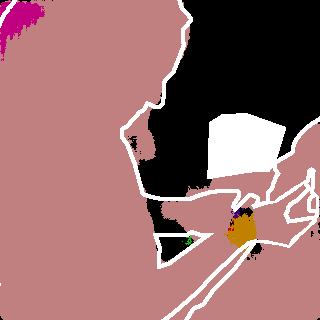

In [6]:
from PIL import Image
Image.open('./Segmentation/checkpoints/compare/labelPred_normal_1.png')

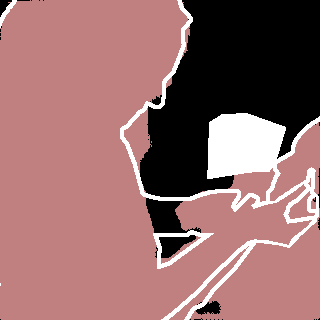

In [5]:
Image.open('./Segmentation/checkpoints/compare/labelPred_dilation_1.png')

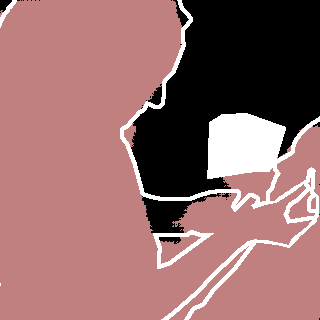

In [7]:
Image.open('./Segmentation/checkpoints/compare/labelPred_spp_1.png')

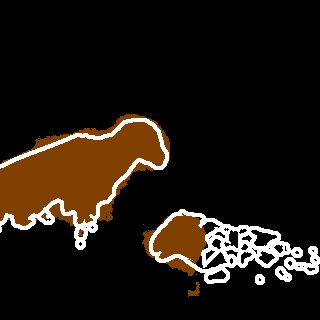

In [8]:
Image.open('./Segmentation/checkpoints/compare/labelPred_normal_2.png')

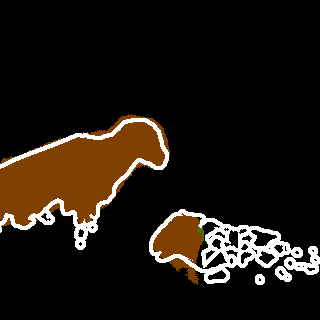

In [9]:
Image.open('./Segmentation/checkpoints/compare/labelPred_dilation_2.png')

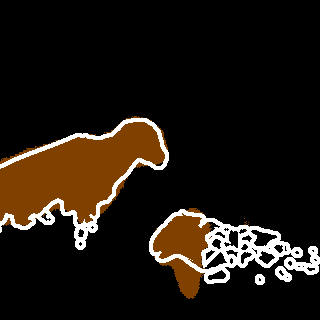

In [10]:
Image.open('./Segmentation/checkpoints/compare/labelPred_spp_2.png')

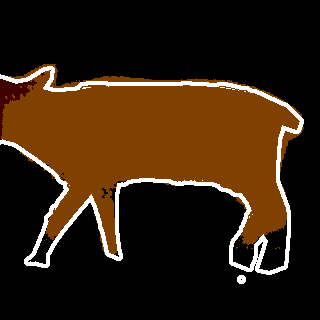

In [11]:
Image.open('./Segmentation/checkpoints/compare/labelPred_normal_3.png')

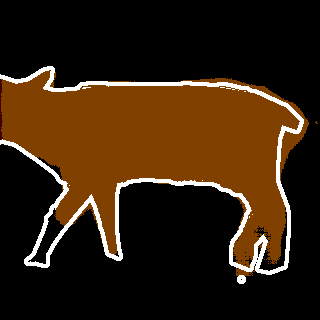

In [12]:
Image.open('./Segmentation/checkpoints/compare/labelPred_dilation_3.png')

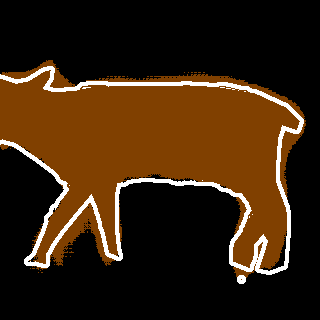

In [13]:
Image.open('./Segmentation/checkpoints/compare/labelPred_spp_3.png')

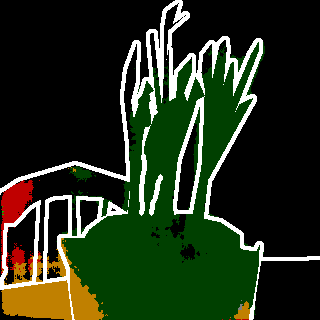

In [14]:
Image.open('./Segmentation/checkpoints/compare/labelPred_normal_4.png')

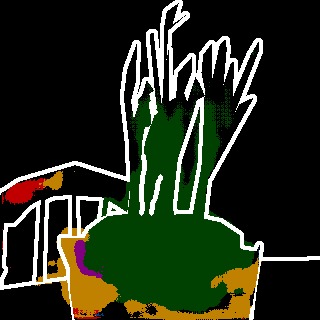

In [15]:
Image.open('./Segmentation/checkpoints/compare/labelPred_dilation_4.png')

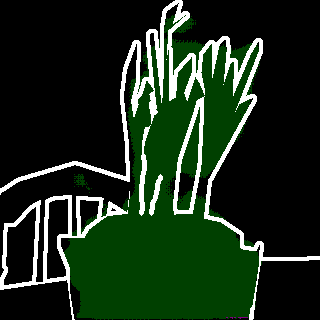

In [16]:
Image.open('./Segmentation/checkpoints/compare/labelPred_spp_4.png')

``Answer Q1.2.D here``  
i) Using a dilated filter helps us to increase the Receptive Field of each layer while preserving the spatial resoution of the feature maps throughout the layers. This helps us to learn and preserve small details yet remember global context with a higher order of receptive field that's offered by the nature of dilated filters covering more pixels per feature map layer.  
  
Another factor that helped here was by adding pyramid pooling to the dilated decoder network. We can achieve an even higher level of global context than pure dilated filters while preserving local context. We are able to learn from added information across different scales and regions. We concatenate these extra features (pooled and convoluted at different scales) to the original feature map and continue our decoder upsampling and convolution back up to input resolution.  
  
ii) A way that I can see to improve this is to use transpose convolution or unpooling instead of billinear interpolation. bilinear interpolation is far less accurate than transpose convolutions and unpooling since it does not retain any global context, from previous shallower layers. Using transpose convolutions/unpooling to upsample along with its respective encoder layer's feature maps to remember a larger finer context such as architectures like U-Net. In the current architecture we do use x3, x4, and x5 together concatenated together so this is a elementary form of U-net, but a deeper network with transpose convolutions/unpooling with this preservation of global context is crucial to the performance of the decoder network.


## Q2: SSD [3] Object Detection

1. **Check the codes in `Detection`.** The codes are modified from ``https://github.com/amdegroot/ssd.pytorch``. Run `eval.py` code to get the object detection average precision (AP) on the PASCAL VOC 2012 dataset. The model is already trained on the PASCAL VOC 2012 object detection dataset. Draw a table in your report summarizing the AP of all 20 object categories and their mean.   **[10 points]**

``Answer Q2.1 here``  

In [19]:
import pandas as pd

df = pd.read_csv('precisions.csv')
pd.options.display.max_columns = 1000
   
df

,Unnamed: 0,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,cow,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor,Mean
0,0,0.781,0.72,0.647,0.465,0.386,0.771,0.685,0.826,0.457,0.648,0.556,0.78,0.725,0.771,0.742,0.349,0.667,0.587,0.781,0.645,0.64


2. **Answer the following questions:**
    1.  Briefly explain how average precision is computed for PASCAL VOC 2012 dataset. Please check the code ($\mathtt{eval.py:~Line~163-191}$) since there are different ways to compute average precision. **[10 points]** 
    2. Explain how SSD can be much faster compared to Faster RCNN [4]? **[10 points]**
    3. Usually the number of negative bounding boxes (boxes without any object) is much larger than the number of positive bounding boxes. Explain how this imbalance is handled in SSD and Faster RCNN, respectively. **[10 points]**

``Answer Q2.2.A here``  
Up until 2008 the way that the industry calculated average precision for the PASCAL VOC 2012 dataset was through "interpolated AP" They would use the 11 point interpolated AP to calculate the area under the recall-precision curve (to deal with the nature of zig-zag shape of the curve. So they would calculate the average precision at each of the 11 points. In other words, calculate the distance under the curve in between each interval of the 11 points, and take the mean of those 11 areas. However, this did not work very well for low AP and in general 11 points was not enough to be accurate for the scale of the dataset.   
  
To deal with this issue, they created the "area under the curve (AUC)" method for all evaluations 2008 and afterwards. Instead of getting the area for 11 points, we get the area whenever the recall-precision curve decreases from the current maximum precision. In simpler terms, whenever a vertical zig zag occurs, we take the sum under the current subsection of the curve (after the previous iteration's zig-zag, but up until the current zig-zag we just observed) . After all the sums are calculated, we take the mean, and that is our official AP for that class. A mean AP would be the mean of all the APs that were calculated for each class. 

``Answer Q2.2.B here``  
First of all, Faster-RCNN/Fast-RCNN has an issue that it is a long and complex pipeline of networks for training and test time inferences. You must pass the image through the initial CNN, Run the output feature maps and the thousands of candidate boxes from the anchors we applied and put them through the RPN (this step is what takes Region based detectors so slow, yet highly accurate), Run those through the Object Classification, through ROI pooling, and then through the final Box refinement and multiway classification. On the other hand, SSD allows us to conduct a method using a single network to create anchors with, which then outputs multiway classification and Box refinement. More specifically, injecting anchor candidacy in each layer of the CNN in SSD while deriving both bondary boxes and class information from the feature maps is the crucial element that makes SSD runtime efficient. What really makes it faster, is that we compute two different convolutions per layer : 4 for coordinates x,y,w,h for bounding box regression, and another c filters for the multiway classification. We then compute K of these for the number of default anchor boxes that we chose to use. This simplifies the training to a 'single' pass which significantly advocates towards the idea of using SSD for a real time system over Region based detectors. 

``Answer Q2.2.C here``  
Faster-RCNN : I believe the question here is referring to the question as to how to find the boxes that actually contain objects, that will then continue down the pipeline and be classified to a specific object. In the case of Faster-RCNN we get all our possible regions from the use of anchors. We then pass these proposals to the Region Proposal network that goes through the object classification network to help the network to decide which patches are actual classificable objects. Given the high order of possible anchors, the RPN is able to decrease the number of possible objects down to a reasonable size for the fully connected layers for bounding box regression and classification.

SSD : We compute and consider anchors at only the scale at which that respective layer's receptive field is. For example a shallower (higher resolution) layer in the network will have a smaller receptive field, but a higher local detail metric compared to that of deeper (lower resolution) layers. Since we cannot effectively reason about a receptive field that is larger than that of one a layer possesses, it is a safe assumption to have a fixed sized anchor per layer since we can assume most possible object sizes will be capture in some layer of the network. This operation decreases the number of anchors (and their respective filters) by a factor of three, or in the terms of output feature map sizes, a factor of (m x n x 3), where m and n is the resolution of the input feature map to that layer. Empirically, the general number of anchors that are negatives are far greater than those that are positive boxes (where there is a possible object in that bounding box). Therefore, we attempt to do a form of hard negative mining where we choose the default anchor boxes that yield the highest classification loss to drive the speed of training to be faster. 

3. Randomly pick up some images from the PASCAL VOC 2012 dataset and some from other sources. Visualize the bounding box prediction results and include a figure in your report. You can use the code in folder $\mathtt{demo}$ for visualization. **[10 points]**

``Answer Q2.3 here``  
The first four are from the test set images for PASCAL, the latter three are images that I captured and inferenced on. I got some interesting corner cases that generated interesting results. The model could not generalize to an ultra wide monitor that I own since it was probably not in the dataset. In addition, the image of the cow was not picked up as a cow even though it was dispayed on an ipad. Instead, the model was able to realize that the ipad was a "tv/monitor" correctly. The model was not able to find the turned off TV and the same dining table that it picked up in the first image that I took of my brother on his phone which was quite interesting. I did not pick up the water bottle in the third photo that I took either.  

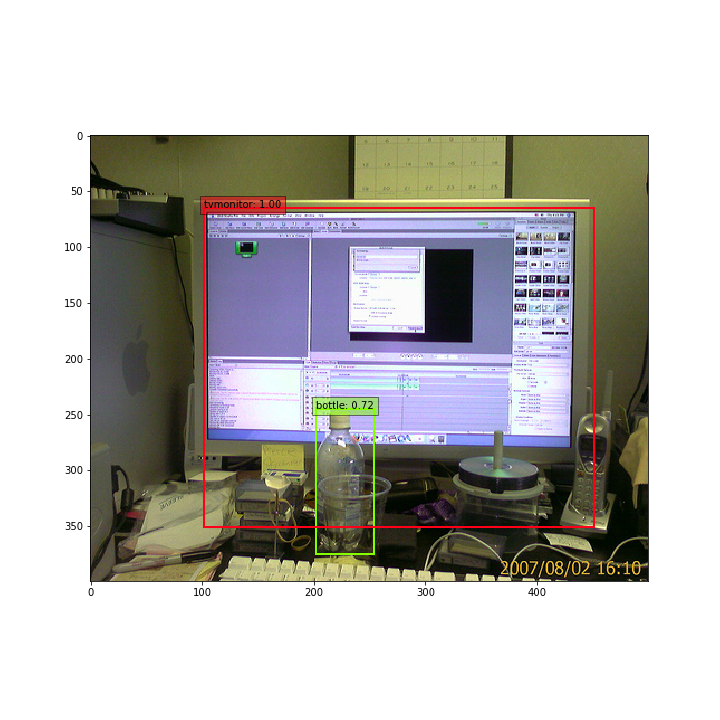

In [2]:
from PIL import Image

Image.open('./Detection/demo/prediction_39.png')

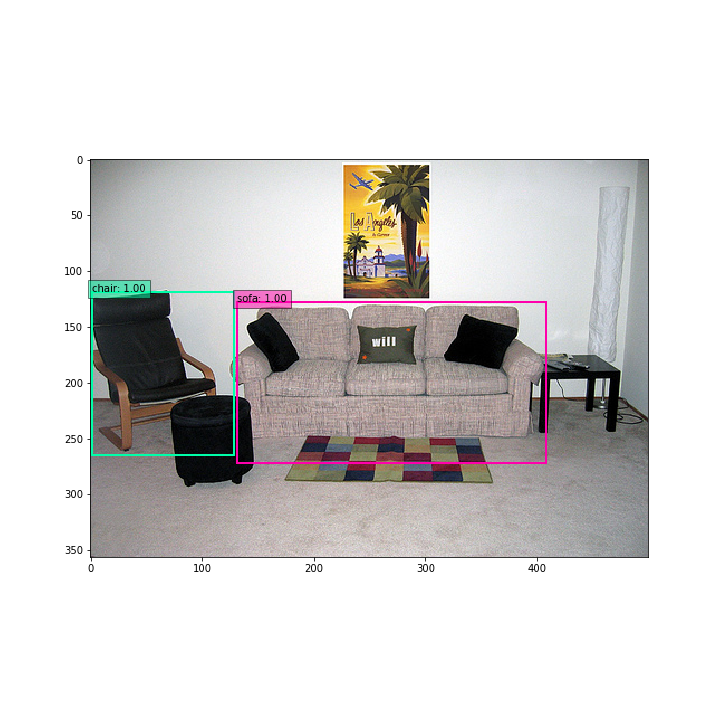

In [3]:
Image.open('./Detection/demo/prediction_40.png')

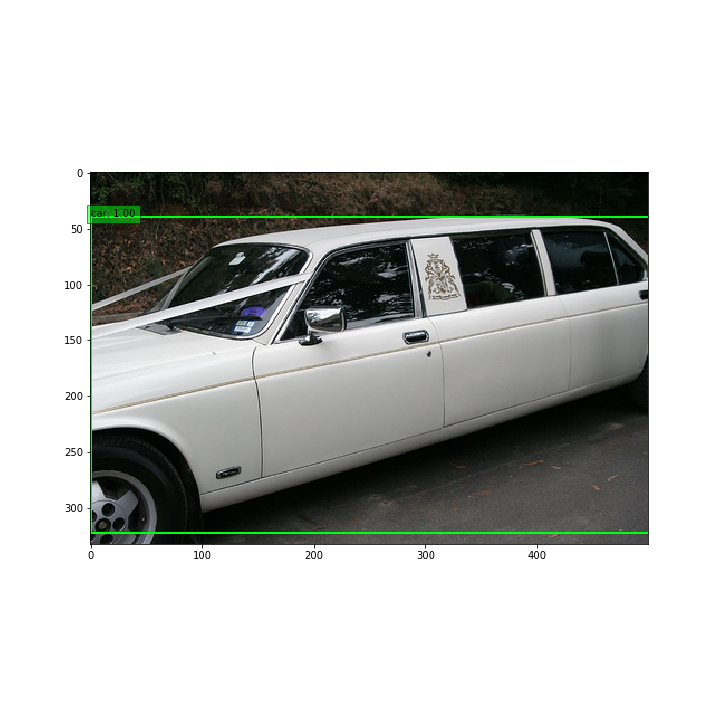

In [4]:
Image.open('./Detection/demo/prediction_41.png')

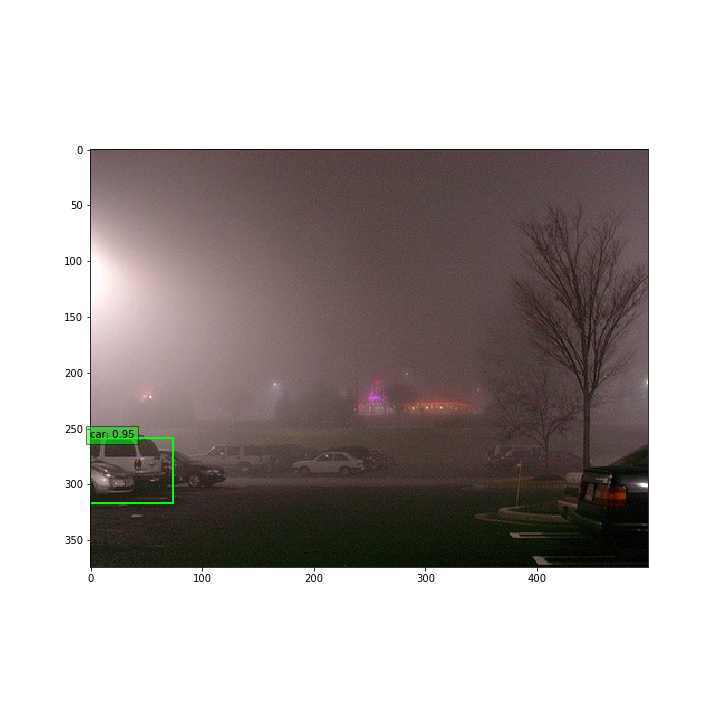

In [5]:
Image.open('./Detection/demo/prediction_42.png')

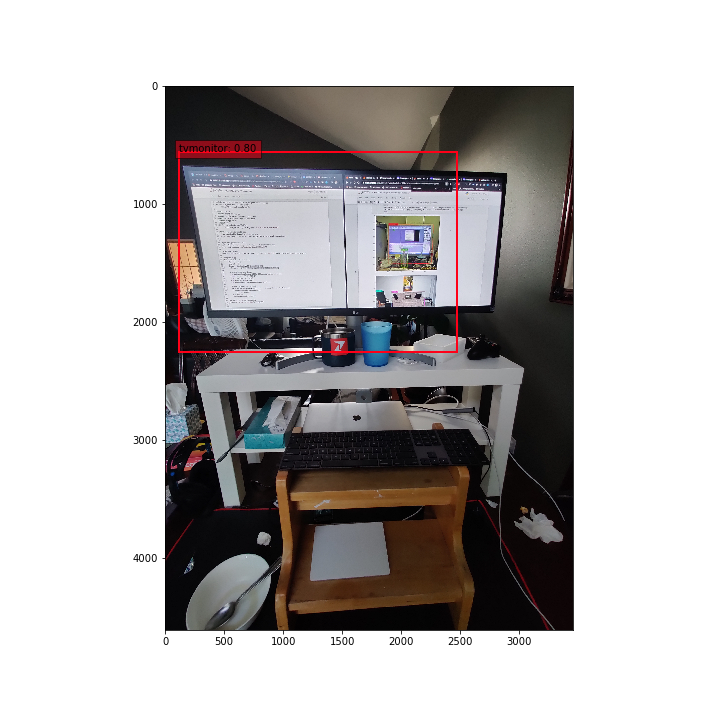

In [6]:
Image.open('./Detection/demo/prediction_custom_1.png')

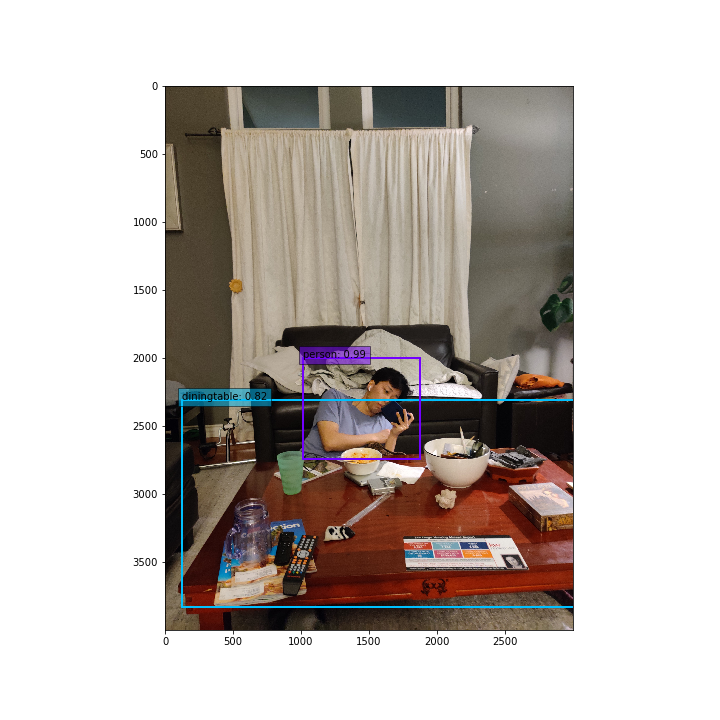

In [7]:
Image.open('./Detection/demo/prediction_custom_2.png')

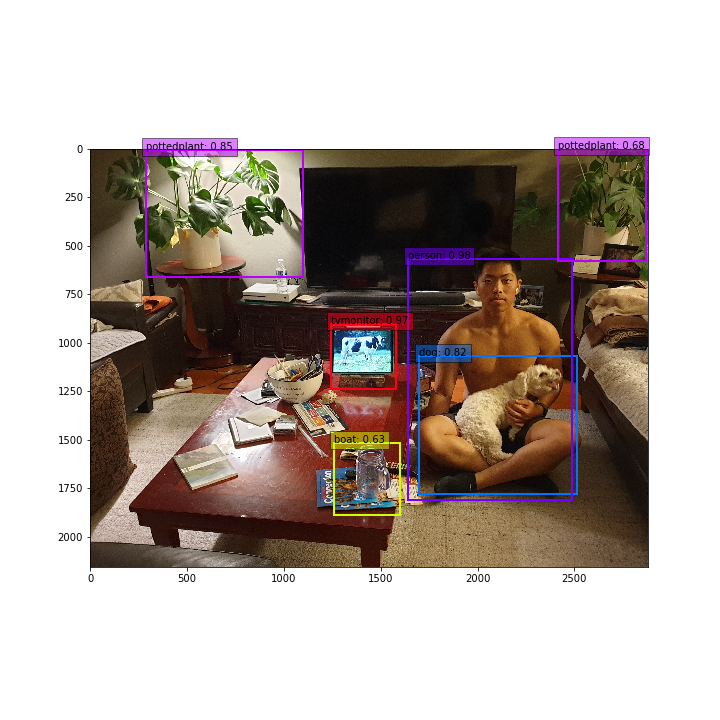

In [8]:
Image.open('./Detection/demo/prediction_everything.png')

## References
1. Yu, Fisher, and Vladlen Koltun. "Multi-scale context aggregation by dilated convolutions." arXiv preprint arXiv:1511.07122 (2015).
2. Zhao, Hengshuang, et al. "Pyramid scene parsing network." Proceedings of the IEEE conference on computer vision and pattern recognition. 2017.
3. Liu, Wei, et al. "Ssd: Single shot multibox detector." European conference on computer vision. Springer, Cham, 2016.
4.  Ren, Shaoqing, et al. "Faster r-cnn: Towards real-time object detection with region proposal networks." Advances in neural information processing systems. 2015.